       사용일자  노선명          역명  승차총승객수  하차총승객수        등록일자
0  20190901  9호선          개화  3483.0  2942.0  20190904.0
1  20190901  6호선  봉화산(서울의료원)  5543.0  5261.0  20190904.0
2  20190901  8호선          수진  4314.0  3922.0  20190904.0
3  20190901  8호선          신흥  3419.0  3664.0  20190904.0
4  20190901  8호선       단대오거리  6496.0  6310.0  20190904.0
            사용일자  노선명   역명  승차총승객수  하차총승객수        등록일자
523336  20210131  중앙선   팔당  1039.0  1089.0  20210203.0
523337  20210131  중앙선  운길산   866.0   797.0  20210203.0
523338  20210131  중앙선   양수  1207.0  1122.0  20210203.0
523339  20210131  중앙선   신원   249.0   160.0  20210203.0
523340  20210131  중앙선   국수   420.0   384.0  20210203.0
사용일자       object
노선명        object
역명         object
승차총승객수    float64
하차총승객수    float64
등록일자      float64
dtype: object
조회역 입력:서울


/Users/wondongchan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wondongchan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


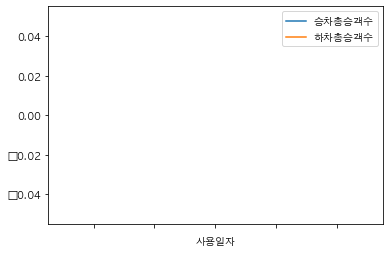

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import font_manager as fm, rc
import csv



### 한글 표기
rc('font', family='AppleGothic')

def Csv_reset(fn):
    ### csv 파일 전처리 함수
    f = open('./subway/'+fn, encoding='utf-8')
    data = csv.reader(f)
    # "사용일자"', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'

    next(data)
    data_lst = []
    for row in data:
        data_lst.append(row[:6])

    df = pd.DataFrame(data_lst, columns=['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'])
    df.to_csv('./subway/'+fn, encoding='cp949', index=False)
    f.close()

def file_read():
    ### subway 폴더에 있는 모든 파일 하나로 만들기
    filePath='./subway/'
    fileName=os.listdir(filePath)  # subway 폴더의 모든 파일 및 하위 폴더 정보를 리스트형으로 가져와 저장

    df1=pd.DataFrame()

    for fn in fileName:
        ### try ~ except : 예외처리 구문
        #print(fn)
        try:   # 정상코드 수행
            df2=pd.read_csv(filePath+fn, encoding='cp949')
        except: # try 구문에서 에러 발생시 처리하기 위한 구문
            Csv_reset(fn)
            df2 = pd.read_csv(filePath + fn, encoding='cp949')
        # 데이터 한개의 파일로 만들기
        df1=pd.concat([df1, df2])

    df1=df1.reset_index(drop=True)

    return df1

def subway_sch1(dfdata, subway_name):
    df2=dfdata[dfdata['역명']==subway_name]
    #print(df2.info())
    df2 = df2.astype({'승차총승객수': 'int64','사용일자':'str'})
    df2.plot(x='사용일자', y='승차총승객수')
    plt.show()

def subway_sch2(dfdata, subway_name):
    df2=dfdata[dfdata['역명']==subway_name]
    #print(df2.info())
    df2 = df2.astype({'승차총승객수': 'int64','사용일자':'str'})
    df2=df2.groupby('사용일자')[['승차총승객수','하차총승객수']].sum()
    df2.plot()
    plt.show()


### 사용자 함수 호출 부분
df1=file_read()
print(df1.head())
print(df1.tail())

print(df1.dtypes)

subway_name=input('조회역 입력:')
subway_sch2(df1, subway_name)